In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read 16S data

In [34]:
df_SCFA = pd.read_excel('../data/SCFA.xlsx', index_col=0)
df_meta = pd.read_excel('../data/meta_data.xlsx', index_col=0)
df_SCFA = pd.merge(df_SCFA[['Acetate','Butyrate','Propionate']], df_meta, left_index=True, right_index=True, how='inner')
df_SCFA = df_SCFA[df_SCFA.Diet=='Inulin']
df_SCFA.head()

,Acetate,Butyrate,Propionate,MiceID,Vendor,Day,Diet
SampleID,,,,,,,
sample100,11.966296,2.590950,4.275835,SI5,Shanghai,19,Inulin
sample111,9.462275,3.442438,5.926475,SI1,Shanghai,25,Inulin
sample112,8.043746,2.392898,5.781750,SI2,Shanghai,25,Inulin
sample113,8.892580,4.202928,6.800796,SI3,Shanghai,25,Inulin
sample114,7.618580,2.063560,5.297692,SI4,Shanghai,25,Inulin


In [35]:
df_SCFA[['Acetate','Butyrate','Propionate']].corr()

,Acetate,Butyrate,Propionate
Acetate,1.000000,0.668055,0.443158
Butyrate,0.668055,1.000000,0.298883
Propionate,0.443158,0.298883,1.000000


In [4]:
df_16S = pd.read_excel('../data/16S_absolute_abundance.xlsx', index_col=0)
df_16S.head()

,A2,ASF356,Acetatifactor,Acetatifactor-muris,Acidovorax,Acinetobacter,Acinetobacter-sp.-CIP-56.2,Acutalibacter-muris,Adlercreutzia-mucosicola,Adlercreutzia-muris,...,[Eubacterium]-ventriosum-group,[Eubacterium]-xylanophilum-group,[Ruminococcus]-gnavus-group,[Ruminococcus]-torques-group,bacterium-enrichment-culture-clone-M153,gut-metagenome,human-gut-metagenome,marine-metagenome,metagenome,mouse-gut-metagenome
SampleID,,,,,,,,,,,,,,,,,,,,,
sample131,0.0,108301.701888,7101.750943,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,63028.039623,0.0,0.0,0.0,165115.709436,0.0,0.0,0.0,1.322701e+05
sample132,0.0,405068.034693,50064.588558,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,80103.341692,0.0,0.0,0.0,106501.033841,0.0,0.0,0.0,1.003112e+06
sample133,0.0,36169.603950,45332.570284,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,221840.237562,0.0,0.0,0.0,1.866352e+05
sample134,0.0,484302.054587,10150.043060,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,105850.449056,0.0,0.0,0.0,919303.900024,0.0,0.0,0.0,8.714537e+05
sample135,0.0,91489.970533,42374.302141,0.0,0.0,0.0,0.0,0.0,12519.680178,0.0,...,0.0,0.000000,0.0,0.0,0.0,581683.602124,0.0,0.0,0.0,5.335310e+05


# Read meta data

In [5]:
df_meta = pd.read_excel('../data/meta_data.xlsx', index_col=0)
df_meta.head()

,MiceID,Vendor,Day,Diet
SampleID,,,,
sample131,BC1,Beijing,0,Control
sample132,BC2,Beijing,0,Control
sample133,BC3,Beijing,0,Control
sample134,BC4,Beijing,0,Control
sample135,BC5,Beijing,0,Control


# Combine data tables

In [6]:
df_16S_meta = pd.merge(df_meta, df_16S, left_index=True, right_index=True, how='inner')
df_16S_meta.head()

,MiceID,Vendor,Day,Diet,A2,ASF356,Acetatifactor,Acetatifactor-muris,Acidovorax,Acinetobacter,...,[Eubacterium]-ventriosum-group,[Eubacterium]-xylanophilum-group,[Ruminococcus]-gnavus-group,[Ruminococcus]-torques-group,bacterium-enrichment-culture-clone-M153,gut-metagenome,human-gut-metagenome,marine-metagenome,metagenome,mouse-gut-metagenome
SampleID,,,,,,,,,,,,,,,,,,,,,
sample131,BC1,Beijing,0,Control,0.0,108301.701888,7101.750943,0.0,0.0,0.0,...,0.0,63028.039623,0.0,0.0,0.0,165115.709436,0.0,0.0,0.0,1.322701e+05
sample132,BC2,Beijing,0,Control,0.0,405068.034693,50064.588558,0.0,0.0,0.0,...,0.0,80103.341692,0.0,0.0,0.0,106501.033841,0.0,0.0,0.0,1.003112e+06
sample133,BC3,Beijing,0,Control,0.0,36169.603950,45332.570284,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,221840.237562,0.0,0.0,0.0,1.866352e+05
sample134,BC4,Beijing,0,Control,0.0,484302.054587,10150.043060,0.0,0.0,0.0,...,0.0,105850.449056,0.0,0.0,0.0,919303.900024,0.0,0.0,0.0,8.714537e+05
sample135,BC5,Beijing,0,Control,0.0,91489.970533,42374.302141,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,581683.602124,0.0,0.0,0.0,5.335310e+05


# Plot parabacteroides and explain why Shanghai has low propionate production

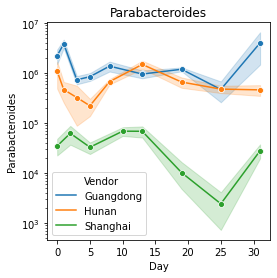

In [44]:
fig, ax = plt.subplots(figsize=(4,4), nrows=1, ncols=1)
curr_df = df_16S_meta[(df_16S_meta.Diet=='Inulin') & (df_16S_meta.Vendor!='Beijing')]
sns.lineplot(x='Day',y='Parabacteroides', marker='o', hue='Vendor', ci=68, data=curr_df, ax=ax) # ci=68 correspond to standard error
ax.set_title(b)
ax.set_yscale('log')

# Plot SCFA producer and degrader

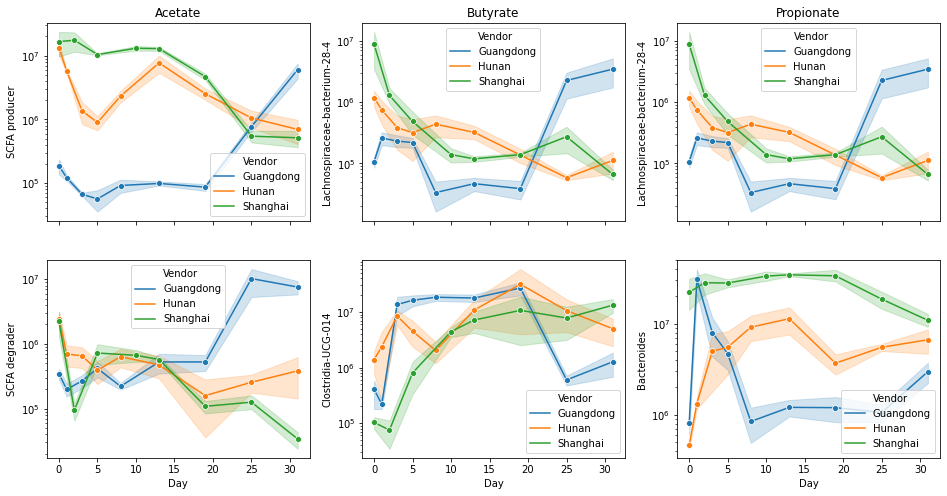

In [65]:
fig, ax = plt.subplots(figsize=(16,8), nrows=2, ncols=3, sharex=True, sharey=False)
curr_df = df_16S_meta[(df_16S_meta.Diet=='Inulin') & (df_16S_meta.Vendor!='Beijing')]

# acetate producer
ac_producer = ['Parabacteroides-goldsteinii']
for t in ac_producer:
    sns.lineplot(x='Day',y=t, hue='Vendor', marker='o', ci=68, data=curr_df, ax=ax[0,0])
ax[0,0].set_title('Acetate')
ax[0,0].set_ylabel('SCFA producer')
ax[0,0].set_yscale('log')

# acetate degrader
ac_degrader = ['Clostridia-vadinBB60-group']
for t in ac_degrader:
    sns.lineplot(x='Day',y=t, hue='Vendor', marker='o', ci=68, data=curr_df, ax=ax[1,0])
ax[1,0].set_ylabel('SCFA degrader')
ax[1,0].set_yscale('log')

# butyrate producer
but_producer = ['Lachnospiraceae-bacterium-28-4']
for t in but_producer:
    sns.lineplot(x='Day',y=t, hue='Vendor', marker='o', ci=68, data=curr_df, ax=ax[0,1])
ax[0,1].set_title('Butyrate')
ax[0,1].set_yscale('log')

# butyrate degrader
but_degrader = ['Clostridia-UCG-014']
for t in but_degrader:
    sns.lineplot(x='Day',y=t, hue='Vendor', marker='o', ci=68, data=curr_df, ax=ax[1,1])
ax[1,1].set_yscale('log')

# propionate producer
ppa_producer = ['Parabacteroides']
for t in but_producer:
    sns.lineplot(x='Day',y=t, hue='Vendor', marker='o', ci=68, data=curr_df, ax=ax[0,2])
ax[0,2].set_title('Propionate')
ax[0,2].set_yscale('log')

# propionate degrader
ppa_degrader = ['Bacteroides']
for t in ppa_degrader:
    sns.lineplot(x='Day',y=t, hue='Vendor', marker='o', ci=68, data=curr_df, ax=ax[1,2])
ax[1,2].set_yscale('log')